# NPLM Visualization

## Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from DataReader import DataReader
from matplotlib.ticker import ScalarFormatter

from NPLM.PLOTutils import *
from NPLM.ANALYSISutils import *

%load_ext autoreload
%autoreload 1
%aimport modules.plot_utils
%aimport modules.analysis_utils

import warnings
warnings.filterwarnings("ignore", message=r"elementwise", category=FutureWarning)

## Functions

In [2]:
def read_data(file_name, n_data):
    '''legge la distribuzione da un file'''
    return DataReader(filename=file_name).build_sample(ndata=n_data)

## Constants

In [3]:
N_REF           = 200000
N_BKG           = 10000
N_SIG           = 0
N_DATA          = N_BKG + N_SIG
EPOCHS          = 50000
ARCHITECTURE    = [2, 3, 3, 1]
WEIGHT_CLIPPING = 10                # 1, 10, 25, 50, 100

KEY      = "loss"
PATIENCE = 1000

DATA_FOLDER    = "../data/"

REFERENCE_RUN  = "00541"
DATA_RUN       = "00541"
REFERENCE_FILE = f"RUN00{REFERENCE_RUN}_channels.h5"
DATA_FILE      = f"RUN00{DATA_RUN}_channels.h5"

FEATURES       = ["drift_time", "theta"]

Reference file: ../data/RUN0000541_channels.h5
Data file: ../data/RUN0000541_channels.h5
Refernce input folder: ./00541/2D/Nref200000_Ndata10000_epochsTau50000_arc2_3_3_1_wclip10
Data input folder: ./00541/2D/Nref200000_Ndata10000_epochsTau50000_arc2_3_3_1_wclip10
Reference output folder: ./out_ref/
Data output folder: ./out_data/


# Full Datasets

In [4]:
df_ref  = DataReader(DATA_FOLDER+REFERENCE_FILE).df[FEATURES]
df_data = DataReader(DATA_FOLDER+DATA_FILE).df[FEATURES]

print("\nREFERENCE:\n")
print("Number of hits:",     df_ref.shape[0])
print("Number of features:", df_ref.shape[1])
print("Features:",      list(df_ref.columns))

print("\nDATA:\n")
print("Number of hits:",     df_data.shape[0])
print("Number of features:", df_data.shape[1])
print("Features:",      list(df_data.columns))


REFERENCE:

Number of hits: 1059979
Number of features: 2
Features: ['drift_time', 'theta']

DATA:

Number of hits: 1059979
Number of features: 2
Features: ['drift_time', 'theta']


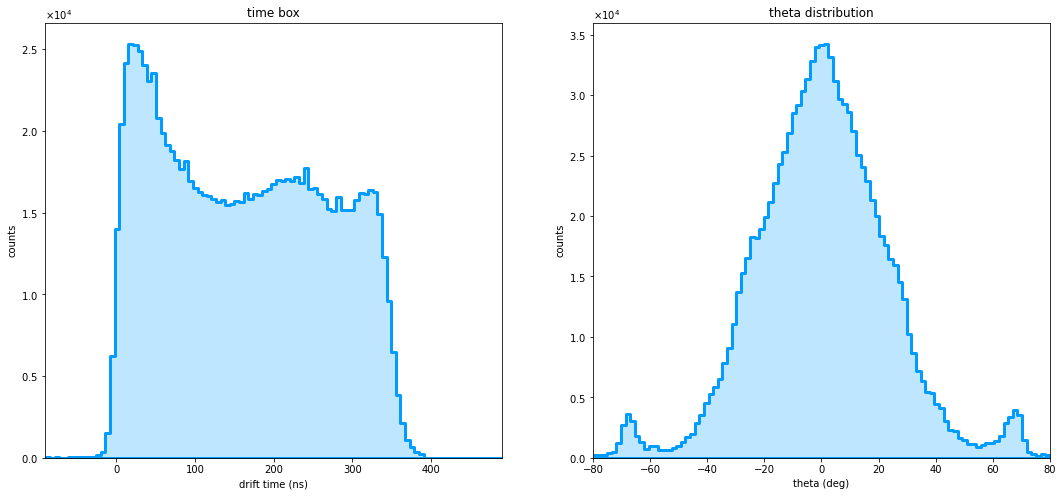

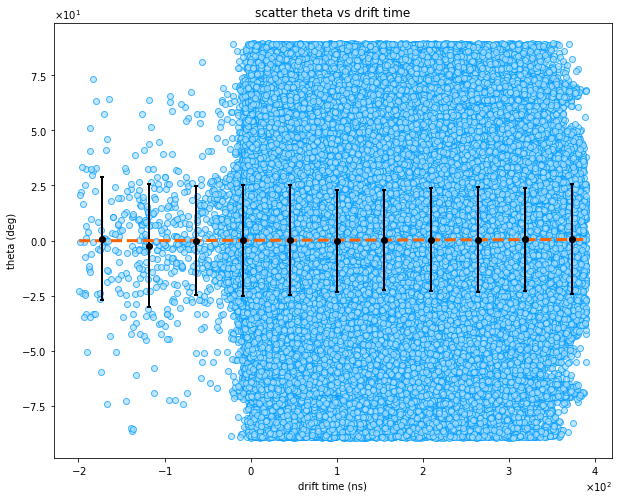

In [5]:
# BINS:
# drift time
dt_bins    = np.linspace(-90, 490, 100)
# theta
theta_bins = np.linspace(-80, 80, 100)

BINS = [dt_bins, theta_bins]

fig, ax = modules.plot_utils.plot_full_dataset(df_ref, FEATURES, BINS)
plt.show()
fig, ax = modules.plot_utils.plot_full_scatter(df_ref, FEATURES)
plt.show()

## NPLM Datasets

In [6]:
DATA = read_data(file_name=DATA_FOLDER+DATA_FILE, n_data=N_DATA)
REF  = read_data(file_name=DATA_FOLDER+REFERENCE_FILE, n_data=N_REF)

weightsData = np.ones(DATA.shape[0])
weightsRef  = np.ones(REF.shape[0])*N_DATA*1./N_REF

weights = [weightsRef, weightsData]

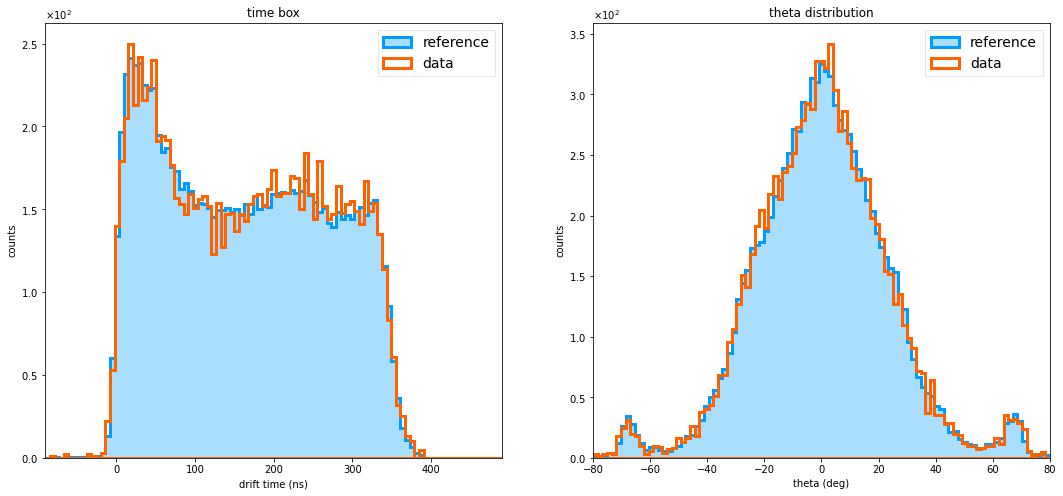

In [7]:
fig, ax = modules.plot_utils.plot_ref_data_1(REF, DATA, FEATURES, BINS, weights)